# Guided Project: Investgating Fandango Movie Ratings

What is this project about?
- This project is about finding out if Fandango has made any changes to its previously biased rating system.
- I will analyze the ratings data from Fandango to see if the presented ratings still misleads the actual ratings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read in and explore the data
df_before = pd.read_csv("fandango_score_comparison.csv")
df_after = pd.read_csv("movie_ratings_16_17.csv")

In [9]:
df_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [10]:
df_before.shape

(146, 22)

In [6]:
df_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [11]:
df_after.shape

(214, 15)

In [12]:
# Extract columns related to Fandango
fdg_before = df_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                       'Fandango_votes', 'Fandango_Difference']].copy()
fdg_after = df_after[['movie', 'year', 'fandango']].copy()

## About the data:
- The df_before dataset contains every movie on Fandango, with at least 30 fan reviews. It was pulled from Fandango on Aug. 24, 2015
- The df_after dataset contains Fandango movie ratings for 214 most popopular movies, with a significant number of votes released in 2016 and 2017, pulled on March 22, 2017

The sampling was clearly not random. So, it is unlikely that these samples are representative of the entire population which is all movies on Fandango's website.

## Changing the goal of my analysis
Instead of trying to collect new data which represents the population well, my new goal is to check if there is any difference between the ratings for popular movies in 2015 and those of 2016.
- Population before changing the goal: all movies on Fandango before and after a certain point in 2015
- Population after changing the goal: "popular" movies in each of 2015 and 2016

## Isolating the samples I need
I will define "popular" movies as the ones with more than 30 ratings on Fandango website. For the df_previous, I don't need to check its eligibility because it originally contains only movies that have more than 30 fan ratings. However, to check whether the movies in the df_after dataset are "popular", I will have to sample a number of movies from it and check if those movies have more than 30 ratings on the website manually.

In [13]:
fdg_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


By manually checking out the website, I found out that 90% of the above movies are "popular". So, I conclude that the dataset represens the population well.

Next, let's extract movies that were released in 2016 and 2017 respectively.

In [29]:
fdg_before['year'] = fdg_before['FILM'].copy().apply(lambda x: int(x[-5:-1]))

In [31]:
fdg_2015 = fdg_before[fdg_before['year'] == 2015]
fdg_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [27]:
fdg_2015.shape

(129, 6)

In [32]:
fdg_2016 = fdg_after[fdg_after['year'] == 2016]
fdg_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [28]:
fdg_2016.shape

(191, 3)

# Reday to analyze!

## KDE plot

In [66]:
import numpy as np

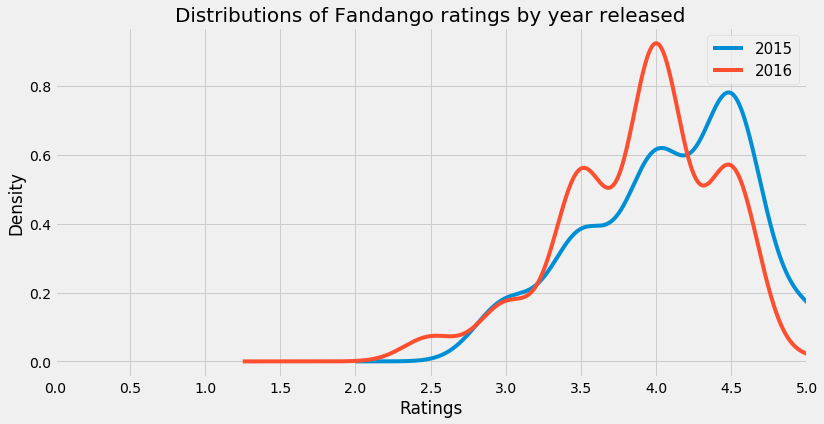

In [70]:
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
fdg_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fdg_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Distributions of Fandango ratings by year released', fontsize=20)
plt.xlim(0, 5)
plt.xlabel('Ratings')
plt.legend(fontsize=15)
plt.xticks(np.arange(0,5.5,0.5));


- Both distributions are skewed to the left; not single movie has been rated 1.0 or below
- 2016 distribution is located slightly left to 2015 distribution; the mode for 2015 is 4.5 whereas the mode of 2016 is 4.0
- Overall, movies were rated lower in 2016 than in 2015 by Fandango 

## Frequency tables

In [90]:
print("Relative Frequency Table for 2015")
fdg_2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False) * 100

Relative Frequency Table for 2015


5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [91]:
print("Relative Frequency Table for 2015")
fdg_2016['fandango'].value_counts(normalize=True).sort_index(ascending=False) * 100

Relative Frequency Table for 2015


5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

Five-star ratings had significantly decreased in 2016 compared to in 2015. Moreover, Ratings below 3.0 appeared in 2016. However, majority of the movies are still rated very high; the skewedness of the two distributions are not very different.

## Comparing summary statistics

In [158]:
summary = pd.DataFrame(
    {2015: [fdg_2015['Fandango_Stars'].mean(), fdg_2015['Fandango_Stars'].median(), fdg_2015['Fandango_Stars'].mode()[0]],
    2016: [fdg_2016['fandango'].mean(), fdg_2016['fandango'].median(), fdg_2016['fandango'].mode()[0]]},
    index = ['mean', 'median', 'mode']
)
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Text(0,0.5,'Stars')

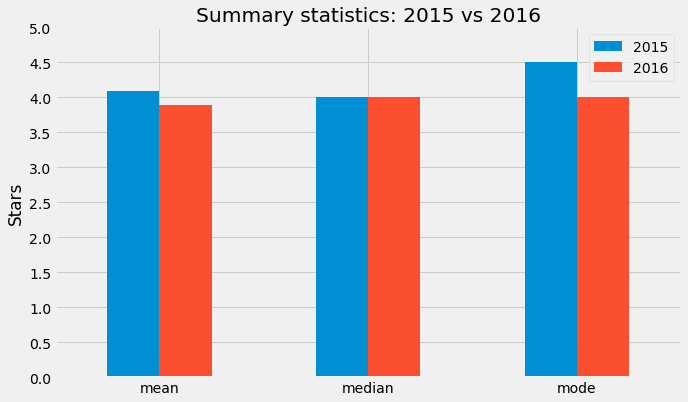

In [184]:
summary.plot.bar(figsize=(10,6), ylim=(0,5), yticks=np.arange(0,5.5,0.5), rot=0,
                title='Summary statistics: 2015 vs 2016')
plt.ylabel('Stars')

# Conclusion

Although the difference is subtle, it is confirmed that the ratings for popular movies released in 2016 is lower than in 2015. The medians are the same, but the mean and the mode decreased in 2016.

It may be just that the movies in 2016 were generally not as good as the ones in 2015, but it is also probable that Hickey's news article had some effect on the ratings by forcing Fandango to fix the bias in their system.